In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [18]:
data_iris = load_iris() #Cargamos una libreria que contiene datos, informacion de las columnas, output, entre otras cosas
data_iris.keys() #Esto nos imprime los nombres de las llaves del diccionario

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df = pd.DataFrame(data=data_iris['data'],columns=data_iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# EDA:

Analisis univariante:

In [4]:
df.describe().T #Esto nos describe las variables estadísticas de los datos

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


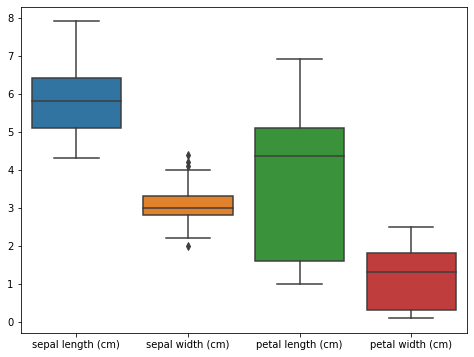

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

Analisis bivariante:

<Figure size 720x576 with 0 Axes>

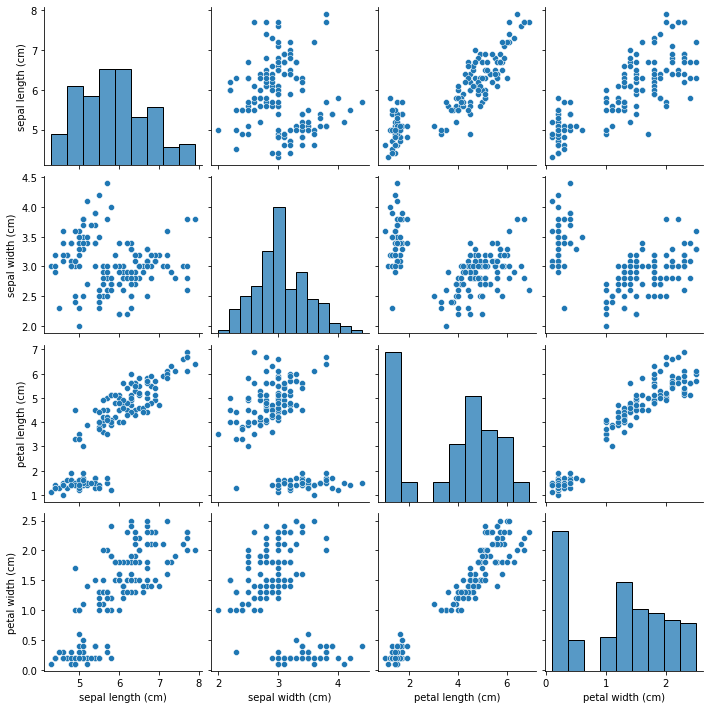

In [6]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df)
plt.show()

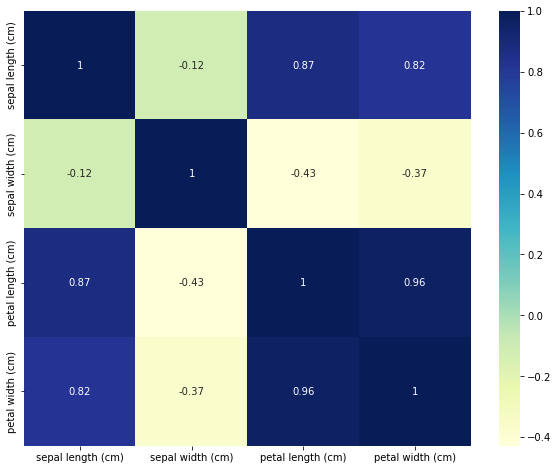

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# PCA:

In [8]:
data_standard = StandardScaler().fit_transform(df.values)

In [9]:
pca = PCA(n_components=2).fit(data_standard)
pca_projection = pca.transform(data_standard)
pca_projection

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

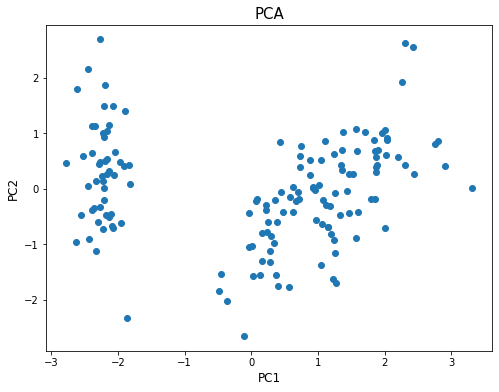

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(*pca_projection.T)
plt.title("PCA", size=15)
plt.xlabel("PC1", size=12)
plt.ylabel("PC2", size=12)
plt.show()

# KMeans:

In [14]:
kmeans = KMeans(n_clusters=3, random_state=27).fit(data_standard)

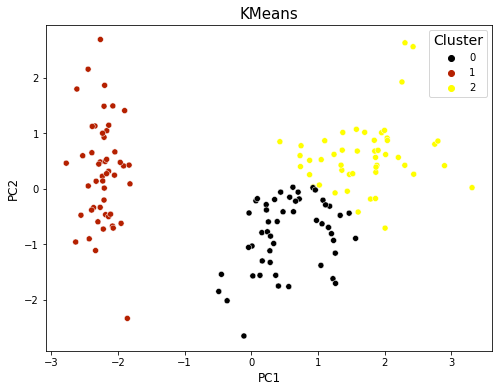

,PC1,PC2,cluster
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,0
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [21]:
df_pca = pd.DataFrame(pca_projection,columns = ['PC1','PC2'])
df_pca['cluster'] = kmeans.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='cluster', palette="gnuplot")
plt.legend(title='Cluster', fontsize='10', title_fontsize='14')
plt.title("KMeans",fontsize=15)
plt.xlabel("PC1", size=12)
plt.ylabel("PC2", size=12)
plt.show()
df_pca

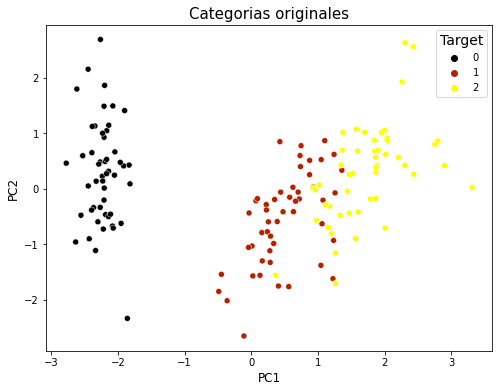

In [16]:
df_pca['target'] = load_iris()['target']
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='target', palette="gnuplot")
plt.legend(title='Target', fontsize='10', title_fontsize='14')
plt.title("Categorias originales",fontsize=15)
plt.xlabel("PC1", size=12)
plt.ylabel("PC2", size=12)
plt.show()